In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn import gaussian_process as gp

In [2]:
# input, observations
S = np.array([
    [0., 0.],
    [1., 0.],
    [0., 1.],
    [1., 1.]
])
f = np.array([
    1., 1.,
    0, -1.])
var_i = np.array([
    1, 1,
    1, 1])

# interpolation points
x = np.linspace(0, 1)
y = np.linspace(0, 1)
s_interpolated = np.transpose(np.meshgrid(x, y), [1,2,0]).reshape((-1,2))

In [3]:
kernel = gp.kernels.ConstantKernel(var_i.max(), constant_value_bounds=[var_i.max(), 1.1]) * gp.kernels.RBF(length_scale=0.7, length_scale_bounds=[0.7, 0.71])

gaussian_process = gp.GaussianProcessRegressor(kernel)
gaussian_process.fit(S, f)
print(gaussian_process.kernel_)

mean_prediction, std_prediction = gaussian_process.predict(s_interpolated, return_std=True)
mean_prediction = mean_prediction.reshape((50,50))
std_prediction = std_prediction.reshape((50,50))

1**2 * RBF(length_scale=0.7)


/home/vik/Programme/anaconda3/envs/pct/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/vik/Programme/anaconda3/envs/pct/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.7. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


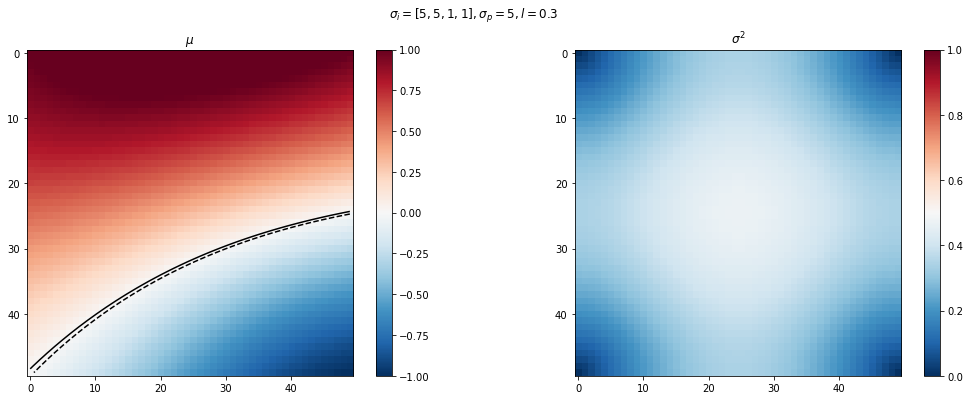

In [4]:
plt.figure(figsize=(18,6))
plt.suptitle(r'$\sigma_i = [5, 5, 1, 1], \sigma_p = 5, l = 0.3$')
plt.subplot(1,2,1)
plt.title(r'$\mu$')
plt.contour(mean_prediction, levels=[-0.01, 0.01], colors='k')
plt.imshow( mean_prediction, interpolation='none', cmap='RdBu_r', vmin=-1, vmax=1 )
plt.colorbar()

plt.subplot(1,2,2)
plt.title(r'$\sigma^2$')
plt.imshow( std_prediction, interpolation='none', cmap='RdBu_r', vmin=0, vmax=var_i.max() )
cbar = plt.colorbar()

plt.show()